In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
!kaggle datasets download -d muhammadmasdar/tomato-disease-ready


Dataset URL: https://www.kaggle.com/datasets/muhammadmasdar/tomato-disease-ready
License(s): unknown
 87% 113M/130M [00:00<00:00, 128MB/s] 
100% 130M/130M [00:01<00:00, 126MB/s]
unzip:  cannot find or open chili-plant-disease.zip, chili-plant-disease.zip.zip or chili-plant-disease.zip.ZIP.


In [4]:
!unzip tomato-disease-ready.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: tomato_disease_ready/train/late_blight/e10eb7f2-7449-4061-bb0a-49fa55abd423___RS_Late.B 6718.JPG  
  inflating: tomato_disease_ready/train/late_blight/e114b022-a00f-4055-9ff0-ae67c6722607___RS_Late.B 5024.JPG  
  inflating: tomato_disease_ready/train/late_blight/e131a4c1-21d7-40cd-a19f-02456e411750___GHLB Leaf 3 Day 1.JPG  
  inflating: tomato_disease_ready/train/late_blight/e142d2de-6aeb-4d1c-9184-d6e46647ad6a___RS_Late.B 5203.JPG  
  inflating: tomato_disease_ready/train/late_blight/e14dc5d0-5671-43e0-9d32-a8331c9455a4___RS_Late.B 6123.JPG  
  inflating: tomato_disease_ready/train/late_blight/e1501757-3235-4051-b460-52c0f6e45add___RS_Late.B 4910.JPG  
  inflating: tomato_disease_ready/train/late_blight/e1836b6b-a14d-402a-ac9f-db7d12feeec9___RS_Late.B 4924.JPG  
  inflating: tomato_disease_ready/train/late_blight/e19d885a-349c-4e13-b015-5c17d2895b30___GHLB2 Leaf 94.JPG  
  inflating: tomato_disease_ready/train/lat

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

In [6]:
train_images = torchvision.datasets.ImageFolder('/content/tomato_disease_ready/train',transform=transform)
val_images = torchvision.datasets.ImageFolder('/content/tomato_disease_ready/validation',transform=transform)
test_images = torchvision.datasets.ImageFolder('/content/tomato_disease_ready/test',transform=transform)

In [7]:
trainloader = torch.utils.data.DataLoader(train_images,batch_size=4,shuffle=True,num_workers=2)
valloader = torch.utils.data.DataLoader(val_images,batch_size=4,num_workers=2)
testloader = torch.utils.data.DataLoader(test_images,batch_size=4,num_workers=2)

classes = train_images.classes

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

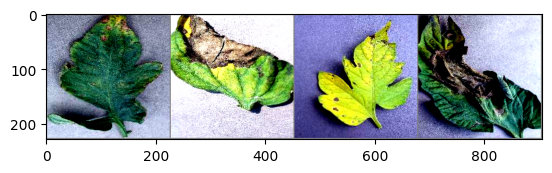

bacterial_spot late_blight septoria_leaf_spot late_blight


In [17]:
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

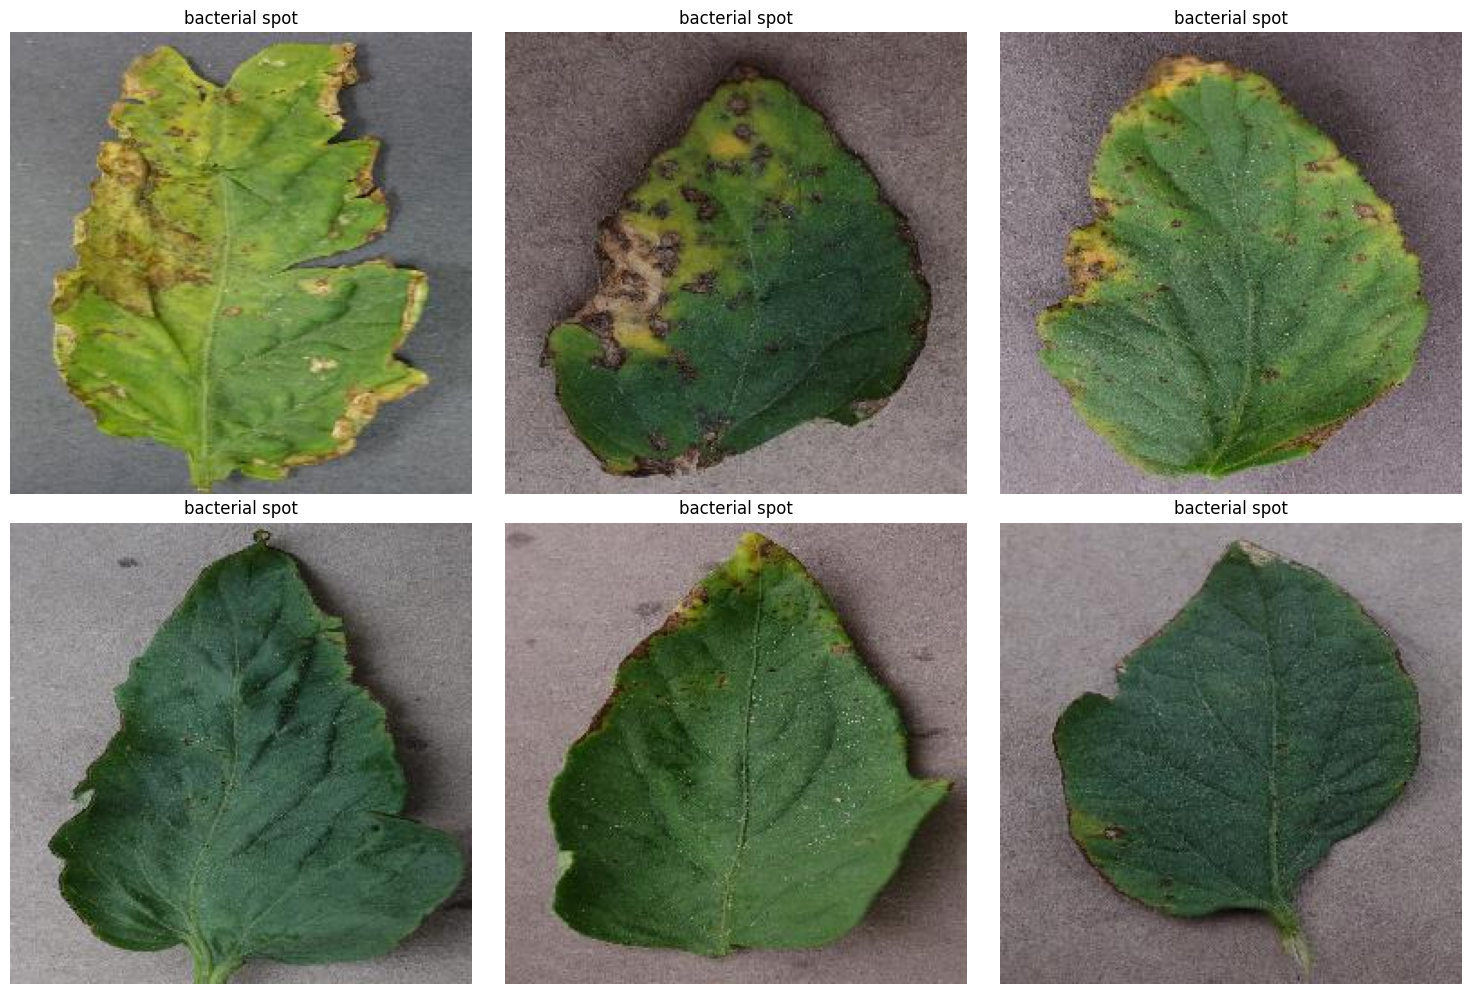

In [19]:
import matplotlib.image as mpimg
# Path to the directory containing images
path = "/content/tomato_disease_ready/train/bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = "bacterial spot"

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [20]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 163MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
AlexNet_model.classifier[6] = nn.Linear(4096,len(classes))
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [23]:
#Loss
criterion = nn.CrossEntropyLoss()
#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [24]:
total_params = sum(p.numel() for p in AlexNet_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 57040713


In [27]:
for epoch in range(15):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 40 == 0:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i , running_loss / 40))
            running_loss = 0.0

print('Finished Training of AlexNet')

[1,     0] loss: 0.000
[1,    40] loss: 0.000
[1,    80] loss: 0.000
[1,   120] loss: 0.000
[1,   160] loss: 0.000
[1,   200] loss: 0.000
[1,   240] loss: 0.000
[1,   280] loss: 0.000
[1,   320] loss: 0.000
[1,   360] loss: 0.000
[1,   400] loss: 0.000
[1,   440] loss: 0.000
[1,   480] loss: 0.000
[1,   520] loss: 0.000
[1,   560] loss: 0.000
[1,   600] loss: 0.000
[1,   640] loss: 0.000
[1,   680] loss: 0.000
[1,   720] loss: 0.000
[1,   760] loss: 0.000
[1,   800] loss: 0.000
[1,   840] loss: 0.000
[1,   880] loss: 0.000
[1,   920] loss: 0.000
[1,   960] loss: 0.000
[1,  1000] loss: 0.000
[1,  1040] loss: 0.000
[1,  1080] loss: 0.000
[1,  1120] loss: 0.000
[1,  1160] loss: 0.000
[1,  1200] loss: 0.000
[1,  1240] loss: 0.000
[1,  1280] loss: 0.000
[1,  1320] loss: 0.000
[1,  1360] loss: 0.000
[1,  1400] loss: 0.000
[2,     0] loss: 0.000
[2,    40] loss: 0.000
[2,    80] loss: 0.000
[2,   120] loss: 0.000
[2,   160] loss: 0.000
[2,   200] loss: 0.000
[2,   240] loss: 0.000
[2,   280] 

In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
#         print(labels.size(0))
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 97 %


Accuracy of bacterial spot : 97 %
Accuracy of early blight : 92 %
Accuracy of healthy : 100 %
Accuracy of late blight : 97 %
Accuracy of leaf moild : 100 %
Accuracy of septorial leaf spot : 93 %
Accuracy of spotted spider mite : 96 %
Accuracy of target spot : 97 %
Accuracy of yellow leaf curl virus : 97 %


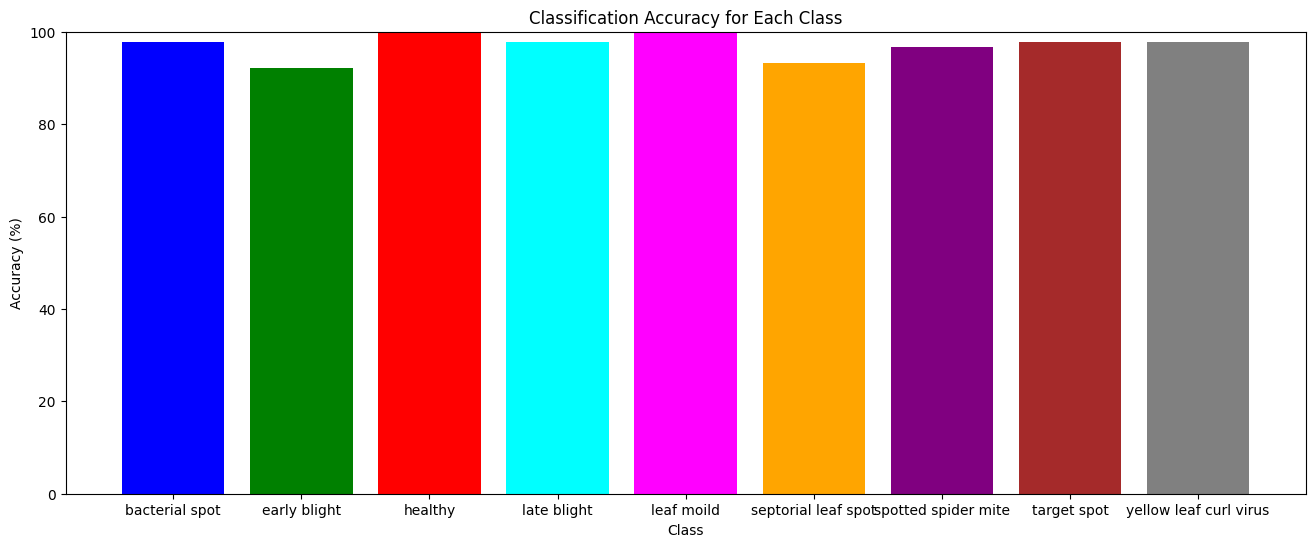

In [32]:
import torch
import matplotlib.pyplot as plt

# Asumsikan classes adalah daftar nama kelas penyakit
classes = ['bacterial spot', 'early blight', 'healthy', 'late blight', 'leaf moild', 'septorial leaf spot', 'spotted spider mite', 'target spot', 'yellow leaf curl virus']

# Testing classification accuracy for individual classes
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

# Evaluasi akurasi model untuk setiap kelas
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Hitung akurasi untuk setiap kelas
class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(len(classes))]

# Print akurasi untuk setiap kelas
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (classes[i], class_accuracy[i]))

# Plotting the accuracy
plt.figure(figsize=(16, 6))  # Atur ukuran figure lebih lebar
plt.bar(classes, class_accuracy, color=['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'gray'])
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Classification Accuracy for Each Class')
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.show()

In [ ]:
# # prompt: write the code to show the graph by data training and validation

# import matplotlib.pyplot as plt
# import numpy as np
# # Extract the training and validation loss values from the training loop
# train_loss = []
# val_loss = []

# # Convert the lists to numpy arrays
# train_loss = np.array(outputs)
# val_loss = np.array(outputs)

# # Create the loss plot
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')

# # Add labels and title
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')

# # Add legend and show the plot
# plt.legend()
# plt.show()


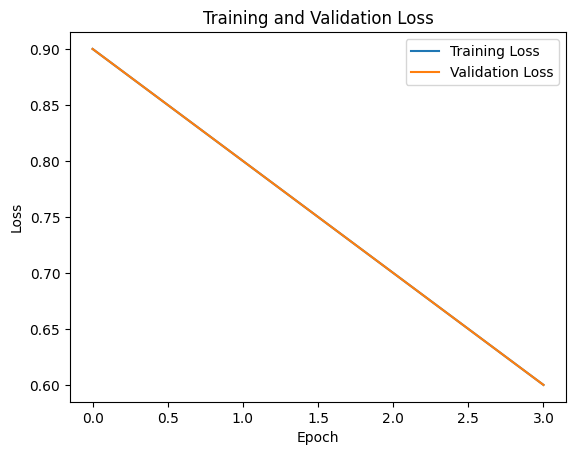

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan train_loss dan val_loss dikumpulkan selama training
train_loss = []
val_loss = []

# Contoh: Tambahkan nilai tensor untuk demonstrasi
# (Pastikan ini diisi dari perhitungan aktual loss saat training)
outputs = torch.tensor([0.9, 0.8, 0.7, 0.6], device='cuda')  # Tensor di GPU

# Convert the tensor to numpy arrays
train_loss = outputs.cpu().numpy()  # Pindahkan ke CPU, lalu ubah ke NumPy
val_loss = outputs.cpu().numpy()    # Sama seperti di atas

# Create the loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend and show the plot
plt.legend()
plt.show()


In [39]:
# Menyimpan model
torch.save(AlexNet_model.state_dict(), 'model.pth')

print("Model telah disimpan sebagai 'model.pth'")


Model telah disimpan sebagai 'model.pth'


In [40]:
# Memuat model dari file yang disimpan
AlexNet_model.load_state_dict(torch.load('model.pth'))
AlexNet_model.eval()  # Ubah model ke mode evaluasi

print("Model berhasil dimuat.")


Model berhasil dimuat.


<ipython-input-40-baf697bca0a4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  AlexNet_model.load_state_dict(torch.load('model.pth'))
